# Comparativo da sua carteira x IBOV

Vamos fazer um estudo de comparação entre uma carteira ficticia e o IBOV, comparando o desempenho de uma frente a noite. 

Utilizando a biblioteca a biblioteca yfinance para capturar os dados e pandas para realizar a manipulação dos dados, vamos visualizar os resultados.

In [1]:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
# Importe as bibliotecas
import yfinance as yf
import pandas as pd


In [25]:
# Coletando os dados de um ativo

ticker    = "AMZN"
sart_date = '2017-01-01'
end_date  = '2023-12-31'
data = yf.download(ticker, 
                   start  = sart_date, 
                   end    = end_date)

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000


<Axes: xlabel='Date'>

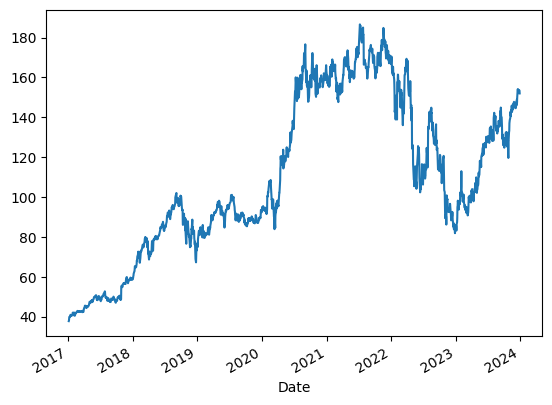

In [26]:
data['Adj Close'].plot()

In [20]:
# Coletando os dados de um ativo utilizando outros parâmetros da yfinance

ticker   = "AMZN"
frequecy = '1mo'
time_frame = '15m'
data = yf.download(ticker, 
                   period      = frequecy, 
                   interval    = time_frame,
                   auto_adjust = True)

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2024-02-29 09:30:00,173.437500,174.250000,172.989502,174.070007,3802078
2024-02-29 09:45:00,174.110001,175.136200,174.039993,174.949997,2264714
2024-02-29 10:00:00,174.960007,175.250000,174.160507,174.369995,1925041
2024-02-29 10:15:00,174.350006,175.050003,174.279999,175.009995,1466100
2024-02-29 10:30:00,175.009995,175.089996,174.505005,174.509995,1167843


<Axes: xlabel='Datetime'>

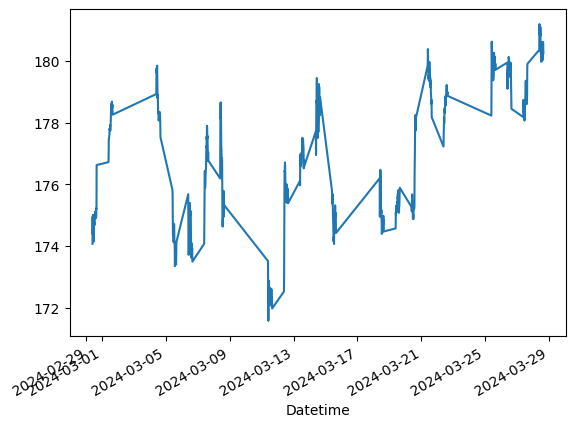

In [21]:
data.Close.plot()

### Construção de carteira e comparação com IBOV

In [74]:
def get_price_tickers_br(tickers, start_date, end_date):
    df = pd.DataFrame()
    
    start_date_search = '2022-01-01'
    end_date_search   = '2024-01-01'
    
    for i in tickers:
        ticker = str(i) + '.SA'
        print(f'Baixando os dados de {ticker}')
        
        df[i] = yf.download(ticker, 
                            start = start_date_search, 
                            end   = end_date_search)['Adj Close']

    print('Download completo')
    return df


start_date = '2022-01-01'
end_date   = '2024-01-01'        
tickers = ['PETR4',
           'VALE3',
           'ABEV3',
           'WEGE3',
           'EMBR3',
           'RADL3',
           'CVCB3',
           'CIEL3',
           'OIBR3',
           'KNRI11']
price = get_price_tickers_br(tickers, start_date, end_date)

Baixando os dados de PETR4.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de VALE3.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de ABEV3.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de WEGE3.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de EMBR3.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de RADL3.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de CVCB3.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de CIEL3.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de OIBR3.SA
[*********************100%%**********************]  1 of 1 completed
Baixando os dados de KNRI11.SA
[*********************100%%**********************]  1 of 1 completed
Download 

In [75]:
price.head()

,PETR4,VALE3,ABEV3,WEGE3,EMBR3,RADL3,CVCB3,CIEL3,OIBR3,KNRI11
Date,,,,,,,,,,
2022-01-03,14.063067,64.069557,13.839315,30.654587,25.240000,21.859320,11.726576,1.893354,7.5,117.305656
2022-01-04,14.116245,63.313854,13.821261,30.501408,25.219999,21.953339,10.961205,1.832836,7.2,114.880753
2022-01-05,13.569965,63.913486,13.550432,28.893045,23.719999,20.937941,10.195834,1.824190,7.1,114.992119
2022-01-06,13.560296,65.203087,13.333770,28.883478,23.870001,20.496050,10.305173,1.780963,7.1,114.743622
2022-01-07,13.623145,68.997971,13.117107,28.155884,24.070000,20.195190,10.505627,1.772318,7.1,114.418022


Agora, vamos normalizar os preços para que não hajam discrepâncias na comparação dos valores entre os ativos.


Vamos calcular **quantos papéis conseguimos comprar de cada um dos ativos** partindo do racional que colocamos R$1000 em cada um deles.

Então precisamos saber o preço do ativo no dia em que compramos ele.

In [93]:
# Extraindo a primeira linha para dividir o valor do ativo pelo valor investido
value_invest = 1000
name_ticker  = price.iloc[0]

purchased = round(value_invest/name_ticker, 0) # arredondo o valor
purchased

PETR4      71.0
VALE3      16.0
ABEV3      72.0
WEGE3      33.0
EMBR3      40.0
RADL3      46.0
CVCB3      85.0
CIEL3     528.0
OIBR3     133.0
KNRI11      9.0
Name: 2022-01-03 00:00:00, dtype: float64

Supondo que eu não comprei e nem vendi nenhum dos meus papéis no período de tempo estabelecido, vamos **calcular o patrimônio liquido** das minhas ações

In [94]:
PL = price * purchased

In [95]:
# Somando os valores e inserindo em uma nova linha
PL['MINHA CARTEIRA'] = PL.iloc[:].sum(axis=1)

In [96]:
# Visualizando investimento inicial em cada papel
PL.head()

,PETR4,VALE3,ABEV3,WEGE3,EMBR3,RADL3,CVCB3,CIEL3,OIBR3,KNRI11,MINHA CARTEIRA
Date,,,,,,,,,,,
2022-01-03,998.477788,1025.112915,996.430710,1011.601364,1009.599991,1005.528706,996.758947,999.690943,997.500000,1055.750908,10096.452271
2022-01-04,1002.253414,1013.021667,995.130821,1006.546452,1008.799973,1009.853577,931.702385,967.737299,957.599975,1033.926773,9926.572335
2022-01-05,963.467541,1022.615784,975.631119,953.470499,948.799973,963.145267,866.645904,963.172520,944.299987,1034.929070,9636.177662
2022-01-06,962.781020,1043.249390,960.031425,953.154779,954.800034,942.818295,875.939698,940.348497,944.299987,1032.692596,9610.115722
2022-01-07,967.243302,1103.967529,944.431732,929.144165,962.799988,928.978760,892.978268,935.783844,944.299987,1029.762199,9639.389775


In [97]:
# Visualizando investimento final em cada papel
PL.tail()

,PETR4,VALE3,ABEV3,WEGE3,EMBR3,RADL3,CVCB3,CIEL3,OIBR3,KNRI11,MINHA CARTEIRA
Date,,,,,,,,,,,
2023-12-21,2583.689957,1178.790527,986.399986,1189.194775,905.199966,1334.920021,336.600003,2310.272163,85.119998,1448.524155,12358.711552
2023-12-22,2608.540119,1169.907837,987.120003,1193.116093,909.599991,1328.939972,336.600003,2315.327454,87.780003,1436.946487,12373.877962
2023-12-26,2650.430130,1174.042969,991.440033,1199.978840,900.800018,1353.320004,338.300002,2386.101517,85.119998,1455.594543,12535.128053
2023-12-27,2652.560043,1185.375977,996.480011,1203.900284,906.399994,1341.359993,340.850019,2411.377968,86.449997,1462.664795,12587.419081
2023-12-28,2644.040119,1182.312866,988.559967,1206.187866,895.599976,1352.399982,297.500000,2370.935646,85.119998,1462.664795,12485.321216


In [110]:
# Capturando dados do IBOV para comparação

ibov = yf.download('^BVSP', start = start_date, end = end_date)
ibov.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500
2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600
2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0
2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200


In [111]:
# Renomeando a coluna que nos interessa (adj close) e removendo as colunas que não iremos utilizar
ibov.rename(columns = {'Adj Close' : 'IBOV'}, inplace = True)
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)
ibov.head()

,IBOV
Date,
2022-01-03,103922.0
2022-01-04,103514.0
2022-01-05,101006.0
2022-01-06,101561.0
2022-01-07,102719.0


In [112]:
# Garantindo que o índice é uma data

PL.index = pd.to_datetime(PL.index)

In [113]:
# Juntando as tabelas

new_df = pd.merge(ibov, PL, how='inner', on='Date')
new_df.head()

,IBOV,PETR4,VALE3,ABEV3,WEGE3,EMBR3,RADL3,CVCB3,CIEL3,OIBR3,KNRI11,MINHA CARTEIRA
Date,,,,,,,,,,,,
2022-01-03,103922.0,998.477788,1025.112915,996.430710,1011.601364,1009.599991,1005.528706,996.758947,999.690943,997.500000,1055.750908,10096.452271
2022-01-04,103514.0,1002.253414,1013.021667,995.130821,1006.546452,1008.799973,1009.853577,931.702385,967.737299,957.599975,1033.926773,9926.572335
2022-01-05,101006.0,963.467541,1022.615784,975.631119,953.470499,948.799973,963.145267,866.645904,963.172520,944.299987,1034.929070,9636.177662
2022-01-06,101561.0,962.781020,1043.249390,960.031425,953.154779,954.800034,942.818295,875.939698,940.348497,944.299987,1032.692596,9610.115722
2022-01-07,102719.0,967.243302,1103.967529,944.431732,929.144165,962.799988,928.978760,892.978268,935.783844,944.299987,1029.762199,9639.389775


In [114]:
# Normalizando os dados da tabela
df_normalize = new_df/new_df.iloc[0]
df_normalize.head()

,IBOV,PETR4,VALE3,ABEV3,WEGE3,EMBR3,RADL3,CVCB3,CIEL3,OIBR3,KNRI11,MINHA CARTEIRA
Date,,,,,,,,,,,,
2022-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2022-01-04,0.996074,1.003781,0.988205,0.998695,0.995003,0.999208,1.004301,0.934732,0.968036,0.960000,0.979328,0.983174
2022-01-05,0.971940,0.964936,0.997564,0.979126,0.942536,0.939778,0.957850,0.869464,0.963470,0.946667,0.980278,0.954412
2022-01-06,0.977281,0.964249,1.017692,0.963470,0.942224,0.945721,0.937634,0.878788,0.940639,0.946667,0.978159,0.951831
2022-01-07,0.988424,0.968718,1.076923,0.947815,0.918488,0.953645,0.923871,0.895882,0.936073,0.946667,0.975384,0.954730


## Visualizando o comparativo da minha carteira vs IBOV

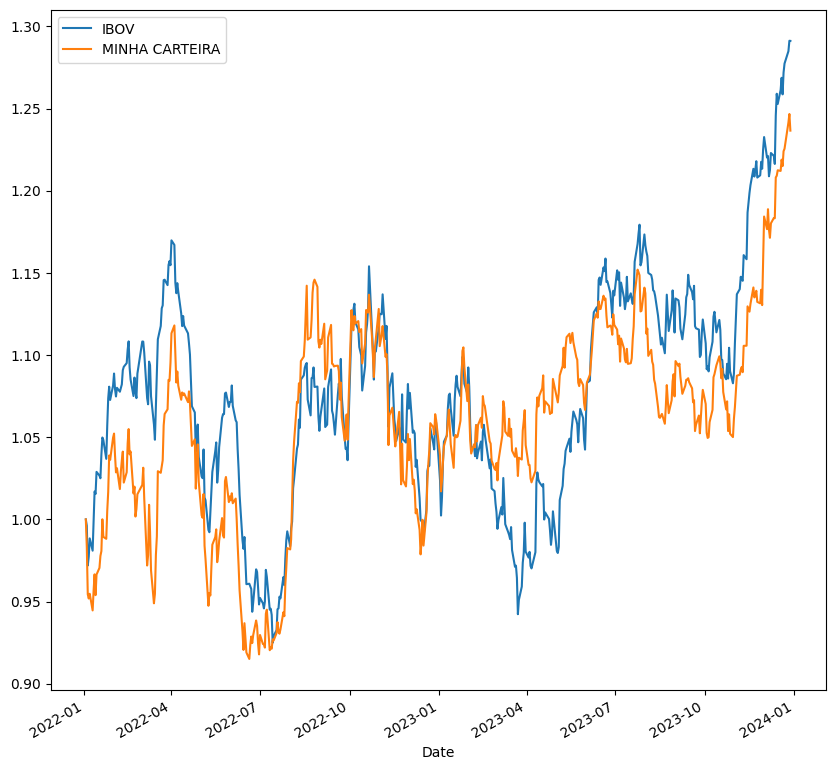

In [116]:
df_normalize[['IBOV', 'MINHA CARTEIRA']].plot(figsize=(10,10));